#import essential libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [2]:
# Load the spam email dataset with specified encoding
data = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


#data preparation

In [4]:
data.shape

(5572, 5)

drop unnecessary columns

In [5]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3','Unnamed: 4']
data = data.drop(columns_to_drop, axis=1)

In [6]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Rename Columns: that can easily understandable 

In [7]:
new_column_names = {'v1': 'label', 'v2': 'email_text'}
data = data.rename(columns=new_column_names)

In [8]:
data.head()

,label,email_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


check missing values in dataset

In [9]:
#data.isnull()

In [10]:
data.isnull().sum()

label         0
email_text    0
dtype: int64

In [11]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

#Data Visualization 

In [12]:
import matplotlib.pyplot as plt 

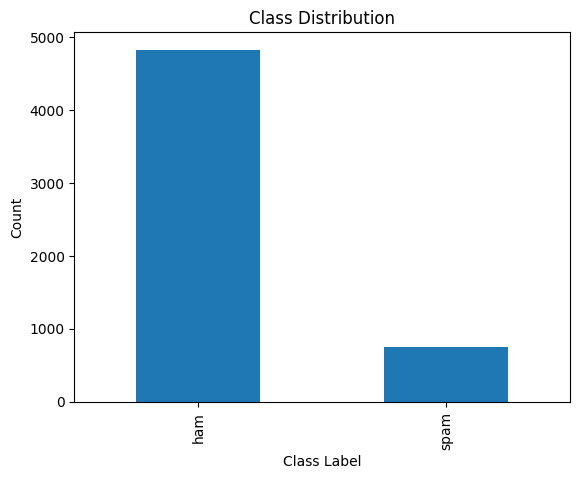

In [13]:
class_counts = data['label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

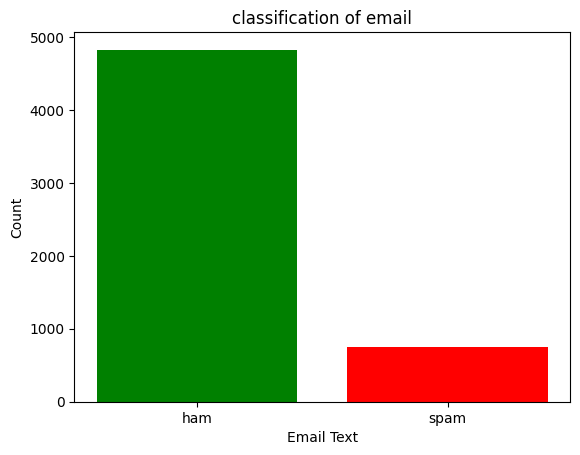

In [25]:
# Count the occurrences of each unique value
value_counts = data['label'].value_counts()

# Plotting
colors = ['green', 'red']
plt.bar(value_counts.index, value_counts.values, color=colors)

# Set labels and title
plt.xlabel('Email Text')
plt.ylabel('Count')
plt.title('classification of email')

# Display the plot
plt.show()

#Model Training:
#Naive Bayes classifier




In [23]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['email_text'], data['label'], test_size=0.2, random_state=42)

# Convert the emails into numerical feature vectors
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)

# Train the Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

# Convert the testing emails into numerical feature vectors
X_test_vectorized = vectorizer.transform(X_test)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vectorized)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


#Achieved 98% accuracy :):)
#......happy coding.........